In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from loaders import load_all_videos

%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
vids = load_all_videos()
vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,is_GB,is_US
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,True,False
1,3s1rvMFUweQ,17.14.11,Taylor Swift: ‚Ä¶Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs ‚Ä¶Ready f...,True,False
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyonc√©,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyonc√© ...,True,False
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,True,False
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,NaN,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",False,True
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,NaN,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,False,True
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,NaN,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,False,True
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,NaN,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,False,True


# Titles

In [3]:
titles = vids.groupby('video_id').first()[['title']]
titles

,title
video_id,
--uXQQ0h-yQ,Paul McCartney - Pipes of Peace
-0CMnp02rNY,Mindy Kaling's Daughter Had the Perfect Reacti...
-0NYY8cqdiQ,Megan Mullally Didn't Notice the Interesting P...
-1Hm41N0dUs,Cast of Avengers: Infinity War Draws Their Cha...
-1yT-K3c6YI,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...
...,...
zxUwbflE1SY,100 People Hold Their Breath for as Long as Th...
zxjv0lo8bU8,MARCELO's son ENZO shows off his skills in the...
zxwfDlhJIpw,kanye west / charlamagne interview


## Hand-crafted features

In [4]:
import re
from nltk.tokenize.casual import casual_tokenize

def num_chars(text):
    return len(text)

def num_words(text):
    return len(casual_tokenize(text))

def num_uppercase_words(text):
    pattern = r'\b[A-Z]+\b'
    return len(re.findall(pattern, text))

def num_repeated_letters(text):
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    return len(re.findall(pattern, text))

def num_question_marks(text):
    return text.count('?')

def num_exclamation_marks(text):
    return text.count('!')

def num_periods(text):
    return text.count('.')

def num_numbers(text):
    pattern = '\d+'
    return len(re.findall(pattern, text))

def num_hashtags(text):
    pattern = '#\w+'
    return len(re.findall(pattern, text))

features = [
    num_chars, num_words, num_uppercase_words,
    num_question_marks, num_exclamation_marks, num_periods,
    num_numbers, num_hashtags
]

for func in features:
    titles[func.__name__] = titles['title'].apply(func)

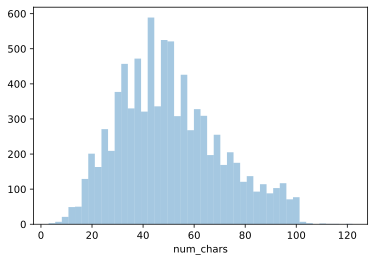

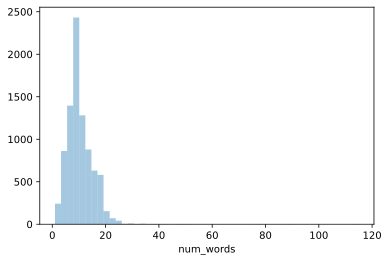

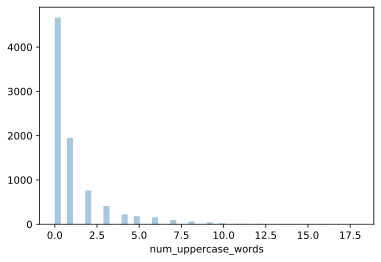

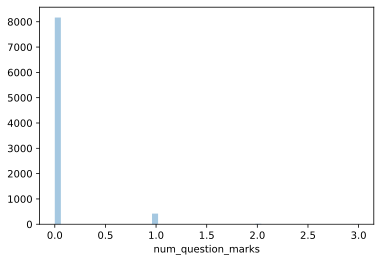

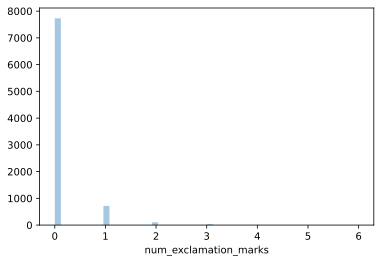

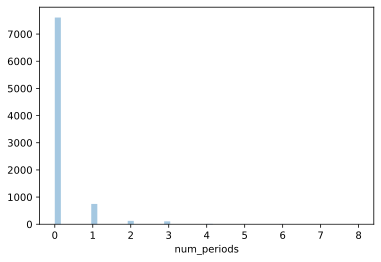

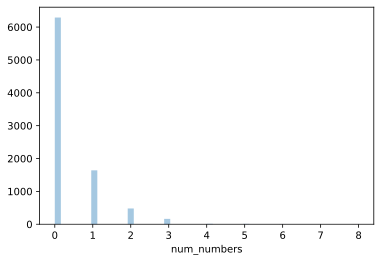

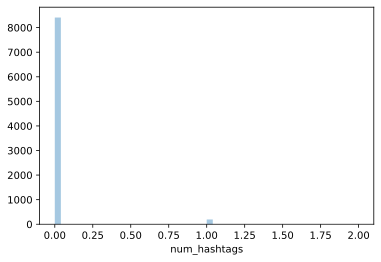

In [20]:
for func in features:
    column = func.__name__
    sns.distplot(titles[column], kde=False)
    plt.show()

## Most frequent words

In [6]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import ngrams

stops = set(stopwords.words('english'))
stops.update(string.punctuation)
stemmer = PorterStemmer()

def most_frequent_words(phrases, ngram_size=1, num_most_common=50):
    counter = Counter()
    for phrase in phrases:
        phrase = phrase.lower()
        tokens = casual_tokenize(phrase)
        tokens = [
            stemmer.stem(token)
            for token in tokens
            if token not in stops
        ]
        if ngram_size > 1:
            tokens = ngrams(tokens, ngram_size)
        counter.update(tokens)
    return counter.most_common(num_most_common)

most_frequent_words(titles['title'])

[('offici', 737),
 ('‚', 651),
 ('video', 530),
 ('2018', 523),
 ('trailer', 443),
 ('new', 267),
 ('2017', 256),
 ('live', 250),
 ('äô', 241),
 ('ft', 239),
 ('vs', 236),
 ('music', 216),
 ('star', 200),
 ('war', 195),
 ('2', 194),
 ('hd', 191),
 ('make', 186),
 ('audio', 184),
 ('first', 177),
 ('day', 176),
 ('1', 171),
 ('show', 159),
 ('„', 157),
 ('movi', 154),
 ('game', 152),
 ('talk', 150),
 ('get', 143),
 ('√', 142),
 ('last', 139),
 ('full', 135),
 ('trump', 130),
 ('black', 128),
 ('5', 122),
 ('christma', 120),
 ('\uf8ff', 119),
 ('makeup', 118),
 ('love', 117),
 ('best', 116),
 ('time', 115),
 ('one', 113),
 ('tri', 112),
 ('10', 108),
 ('take', 107),
 ('3', 106),
 ('espn', 105),
 ('season', 105),
 ('©', 104),
 ('...', 103),
 ('review', 103),
 ('jame', 103)]

In [7]:
most_frequent_words(titles['title'], 2)

[(('‚', 'äô'), 241),
 (('offici', 'video'), 219),
 (('offici', 'trailer'), 189),
 (('star', 'war'), 133),
 (('music', 'video'), 130),
 (('offici', 'music'), 108),
 (('trailer', 'hd'), 105),
 (('last', 'jedi'), 93),
 (('‚', 'äì'), 78),
 (('√', '©'), 76),
 (('lyric', 'video'), 75),
 (('offici', 'audio'), 71),
 (('super', 'bowl'), 57),
 (('war', 'last'), 54),
 (('hd', 'netflix'), 53),
 (('‚', 'äù'), 51),
 (('black', 'panther'), 47),
 (('cardi', 'b'), 47),
 (('teaser', 'trailer'), 44),
 (('first', 'take'), 43),
 (('infin', 'war'), 42),
 (('refineri', '29'), 41),
 (('top', '10'), 40),
 (('video', 'ft'), 40),
 (('aveng', 'infin'), 37),
 (('take', 'espn'), 37),
 (('trailer', '1'), 35),
 (('lebron', 'jame'), 35),
 (('movi', 'hd'), 34),
 (('american', 'idol'), 32),
 (('offici', 'teaser'), 31),
 (('‚', 'äî'), 31),
 (('camila', 'cabello'), 31),
 (('justic', 'leagu'), 30),
 (('season', '2'), 28),
 (('trailer', '2018'), 28),
 (('offici', 'lyric'), 27),
 (('behind', 'scene'), 27),
 (('idol', '2018')

## Sentiment analysis

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def add_sentiment_scores(df, text_column):
    scores = df[text_column].apply(sid.polarity_scores)
    df['sentiment_pos'] = scores.apply(lambda d: d['pos'])
    df['sentiment_neu'] = scores.apply(lambda d: d['neu'])
    df['sentiment_neg'] = scores.apply(lambda d: d['neg'])
    df['sentiment'] = scores.apply(lambda d: d['compound'])
    return df

add_sentiment_scores(titles, 'title');

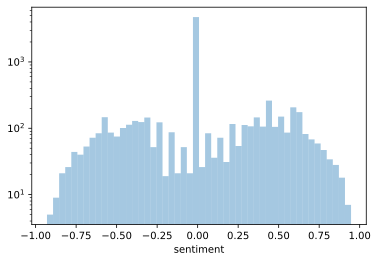

In [9]:
sns.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

# Descriptions

In [10]:
descriptions = pd.DataFrame({ 'description': vids.groupby('video_id').first()['description'].dropna() })

for func in features:
    descriptions[func.__name__] = descriptions['description'].apply(func)

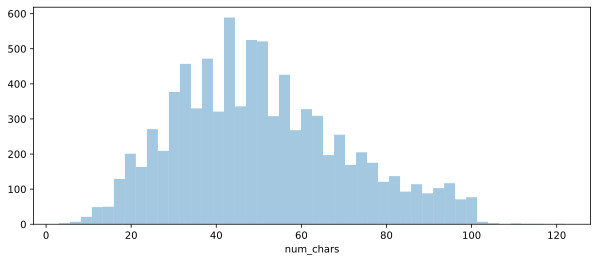

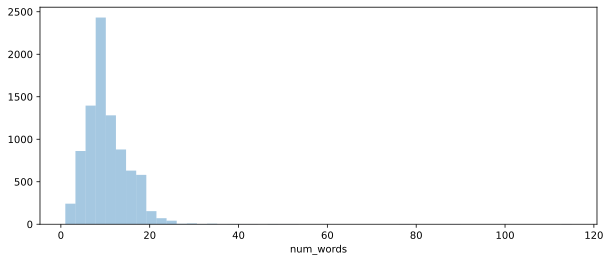

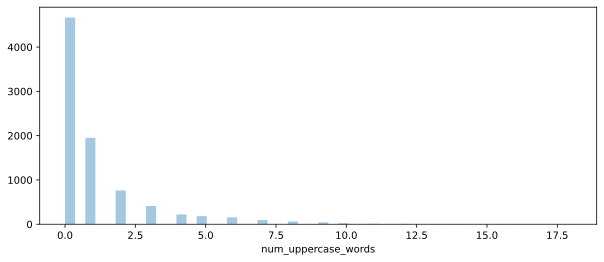

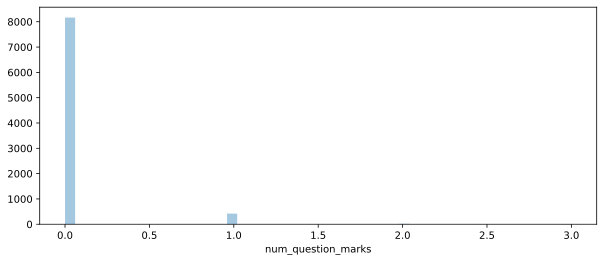

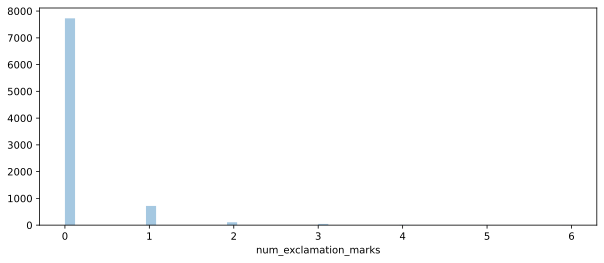

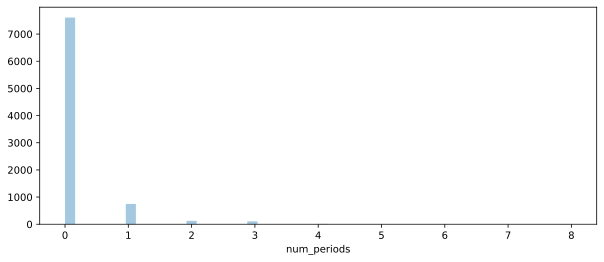

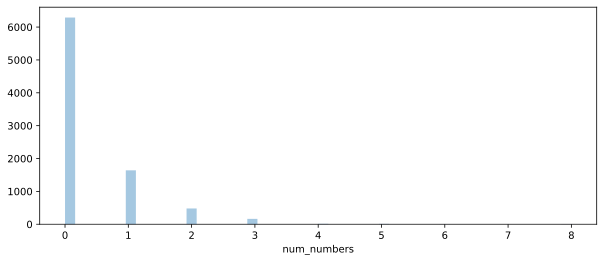

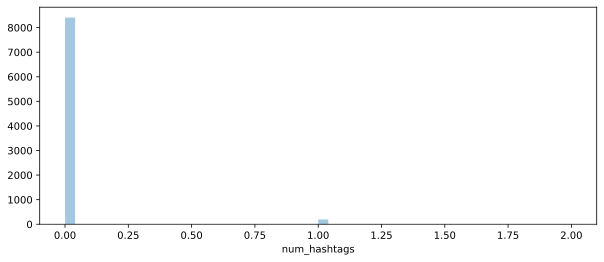

In [11]:
for func in features:
    column = func.__name__
    plt.figure(figsize=(10, 4))
    sns.distplot(titles[column], kde=False)
    plt.show()

## Frequent words

In [12]:
most_frequent_words(descriptions['description'])

[('‚', 26735),
 ('n', 10094),
 ('video', 6592),
 ('ä', 5470),
 ('¬', 5416),
 ('¢', 4998),
 ('ñ', 4261),
 ('follow', 4068),
 ('twitter', 3985),
 ('subscrib', 3726),
 ('show', 3691),
 ('äô', 3580),
 ('instagram', 3578),
 ('music', 3578),
 ('facebook', 3570),
 ('∫', 3535),
 ('watch', 3216),
 ('get', 3186),
 (':/', 2946),
 ('us', 2945),
 ('†', 2918),
 ('like', 2917),
 ('new', 2864),
 ('„', 2579),
 ('youtub', 2561),
 ('channel', 2462),
 ('live', 2452),
 ('nhttp', 2346),
 ('news', 2126),
 ('late', 2045),
 ('äù', 2039),
 ('jimmi', 1969),
 ('use', 1831),
 ('make', 1759),
 (':\\', 1737),
 ('star', 1683),
 ('ª', 1670),
 ('∏', 1641),
 ('one', 1635),
 ('≠', 1616),
 ('product', 1551),
 ('love', 1506),
 ('∞', 1502),
 ('time', 1489),
 ('°', 1479),
 ('offici', 1463),
 ('episod', 1437),
 ('§', 1410),
 ('–', 1394),
 ('world', 1367)]

In [13]:
most_frequent_words(descriptions['description'], 2)

[(('‚', 'ä'), 5240),
 (('ä', '¢'), 4546),
 (('‚', 'ñ'), 4176),
 (('¢', '‚'), 3919),
 (('‚', 'äô'), 3580),
 (('ñ', '∫'), 3255),
 (('nhttp', ':/'), 2346),
 (('‚', 'äù'), 2039),
 (('¬', '†'), 1858),
 (('¬', 'ª'), 1580),
 (('¬', '≠'), 1293),
 (('n', 'n'), 1291),
 (('‚', 'äôt'), 1093),
 (('≠', '¬'), 1067),
 (('late', 'show'), 1065),
 (('jimmi', 'kimmel'), 997),
 (('‚', 'äî'), 951),
 (('ª', '¬'), 849),
 (('‚', 'ô'), 796),
 (('‚', 'äì'), 783),
 (('kimmel', 'live'), 766),
 (('n', '‚'), 759),
 (('tonight', 'show'), 727),
 (('late', 'night'), 701),
 (('music', 'video'), 667),
 (('äî', '‚'), 655),
 (('follow', 'us'), 639),
 (('‚', 'û'), 596),
 (('ñ', '∂'), 576),
 (('jimmi', 'fallon'), 540),
 (('∫', '‚'), 497),
 ((':\\', 'n'), 495),
 (('‚', 'äôm'), 482),
 (('social', 'media'), 460),
 ((':\\', 'nhttp'), 447),
 (('√', '©'), 418),
 (('watch', 'full'), 413),
 (('star', 'war'), 412),
 (('show', 'star'), 411),
 (('star', 'jimmi'), 405),
 (('youtub', 'channel'), 402),
 (('espn', 'youtub'), 400),
 (('äù',

## Sentiment analysis

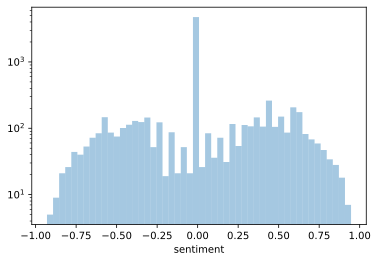

In [14]:
add_sentiment_scores(descriptions, 'description')
sns.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

## tags

In [15]:
def parse_tags(value):
    if value == '[none]':
        return []
    return[tag.strip('"') for tag in value.split('|')]
